In [0]:
def pro_gress():
    import time
    from progressbar import AnimatedMarker,ProgressBar,Percentage,ETA,FileTransferSpeed,Bar
    widgets = ['Processing: ', Percentage(), ' ',
                  Bar(marker='=',left='|',right='|'),
                  ' ', ETA()]
    pbar = ProgressBar(widgets=widgets, maxval=500)
    for i in range(100,500+1,50):
        time.sleep(0.2)
        pbar.update(i)
    pbar.finish()
    print('Done!!')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os,cv2
X_train = []
y_train = []                                                                                                                                                                                                                                               
import cv2
for i in os.listdir('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/train'):
    print(i)
    if (os.path.isdir('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/train/' + i)):
        for j in os.listdir('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/train/' + i):
            try:
                dummy = cv2.imread('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/train/' + i + '/' + j)
                dummy = cv2.resize(dummy,(128,128))
                X_train.append(dummy)
                y_train.append(i)
            except Exception as e:
                print(e)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [4]:
len(X_train)

4770

In [5]:
len(y_train)

4770

In [6]:
import numpy as np
print("Converting X_train & y_train to numpy array's..")
show = pro_gress()
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

Converting X_train & y_train to numpy array's..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [7]:
print("Type of X_train before conversion ==> ",type(X_train))
print(f"Type of X_train is {type(X_train1)} after conversion")

Type of X_train before conversion ==>  <class 'list'>
Type of X_train is <class 'numpy.ndarray'> after conversion


In [8]:
print("Type of y_train before conversion ==> ",type(y_train))
print(f"Type of y_train is {type(y_train1)} after conversion")

Type of y_train before conversion ==>  <class 'list'>
Type of y_train is <class 'numpy.ndarray'> after conversion


Plotting the graph to check the images..


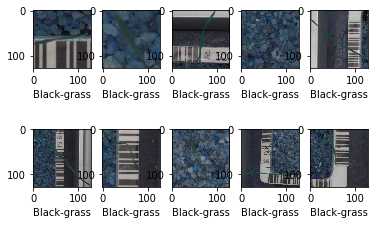

In [9]:
print("Plotting the graph to check the images..")
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train1[i])
  plt.xlabel(y_train1[i])
  i += 1

In [10]:
print(f"The shape of X_train is ==> {X_train1.shape}")

The shape of X_train is ==> (4770, 128, 128, 3)


In [11]:
print(f"The shape of y_train is ==> {y_train1.shape}")

The shape of y_train is ==> (4770,)


In [12]:
from sklearn.preprocessing import LabelEncoder
print("Importing Label Encoder library so as to convert the categories into numbers..")
lenc = LabelEncoder()
print("Transforming y_train...")
show = pro_gress()
y_train2 = lenc.fit_transform(y_train1)
%tensorflow_version 2.x
import tensorflow as tf
print("Transforming y_train to One hot encoding..")
show = pro_gress()
y_train1 = tf.keras.utils.to_categorical(y_train2)

Importing Label Encoder library so as to convert the categories into numbers..
Transforming y_train...


Processing: 100% |=============================================| Time:  0:00:01


Done!!
TensorFlow 2.x selected.
Transforming y_train to One hot encoding..


Processing: 100% |=============================================| Time:  0:00:01


Done!!


In [0]:
X_test = []
import cv2
for i in os.listdir('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/test'):
    dummy = cv2.imread('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/test/' + i)
    dummy = cv2.resize(dummy, (128,128))
    X_test.append(dummy)

In [0]:
X_test1 = np.array(X_test)

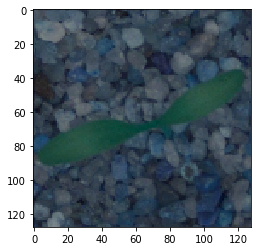

In [15]:
plt.imshow(X_test[0])

In [16]:
print("Datatype is ==>",X_test1.dtype)
print("Shape is ==>",X_test1.shape)

Datatype is ==> uint8
Shape is ==> (800, 128, 128, 3)


In [0]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()

In [0]:
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(12,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print("Creating the model!!")
show = pro_gress()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0

In [20]:
model.fit(X_train1,y_train1,epochs=104,batch_size=32)

Train on 4770 samples
Epoch 1/104
4770/4770 [==============================] - 27s 6ms/sample - loss: 34.8264 - accuracy: 0.3482
Epoch 2/104
4770/4770 [==============================] - 18s 4ms/sample - loss: 8.2135 - accuracy: 0.4017
Epoch 3/104
4770/4770 [==============================] - 18s 4ms/sample - loss: 3.2811 - accuracy: 0.3574
Epoch 4/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 2.4559 - accuracy: 0.3618
Epoch 5/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 2.0136 - accuracy: 0.4088
Epoch 6/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 1.9487 - accuracy: 0.4241
Epoch 7/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 1.7435 - accuracy: 0.4725
Epoch 8/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 1.7598 - accuracy: 0.4616
Epoch 9/104
4770/4770 [==============================] - 19s 4ms/sample - loss: 1.6215 - accuracy: 0.4828
Epoch 10/104
4770/4770 

In [24]:
loss, acc = model.evaluate(X_train1,y_train1)
print(f"The accuracy acheived while training the model is {acc*100}% ")
print(f"The loss was reduced to {loss*100}% while training the model")


4770/4770 [==============================] - 5s 1ms/sample - loss: 0.0999 - accuracy: 0.9681
The accuracy acheived while training the model is 96.81341648101807% 
The loss was reduced to 9.988098036391564% while training the model


In [0]:
y_pred = model.predict(X_test1)

In [26]:
out = []
for i in y_pred:
  out.append(np.argmax(i))
print(out)  

[11, 3, 6, 6, 8, 6, 6, 10, 6, 3, 7, 6, 10, 4, 11, 5, 5, 8, 8, 7, 10, 2, 2, 9, 5, 5, 6, 1, 6, 6, 3, 6, 5, 7, 10, 8, 2, 5, 6, 5, 4, 1, 6, 10, 6, 9, 3, 3, 5, 11, 4, 10, 2, 11, 9, 10, 8, 6, 5, 10, 9, 3, 6, 1, 9, 4, 10, 5, 5, 5, 5, 1, 3, 6, 6, 4, 3, 2, 3, 7, 3, 9, 2, 1, 10, 2, 6, 9, 2, 2, 3, 7, 5, 5, 6, 3, 9, 6, 7, 6, 5, 8, 7, 6, 5, 11, 10, 1, 7, 3, 1, 8, 2, 6, 11, 9, 6, 10, 4, 6, 5, 1, 6, 3, 5, 10, 2, 8, 2, 7, 1, 11, 8, 6, 3, 6, 3, 5, 11, 6, 6, 2, 8, 11, 10, 8, 5, 7, 2, 6, 10, 6, 4, 8, 3, 5, 0, 1, 10, 5, 2, 3, 3, 6, 9, 8, 11, 10, 10, 3, 9, 6, 4, 1, 4, 5, 6, 2, 6, 5, 10, 10, 5, 6, 10, 2, 3, 2, 4, 6, 10, 3, 4, 5, 2, 6, 4, 5, 3, 11, 6, 2, 11, 6, 3, 3, 3, 9, 1, 1, 6, 4, 1, 3, 10, 7, 6, 5, 5, 3, 8, 6, 9, 4, 3, 3, 9, 6, 3, 5, 2, 6, 5, 10, 10, 6, 6, 1, 6, 9, 10, 3, 3, 4, 5, 10, 3, 1, 4, 2, 2, 2, 2, 2, 3, 3, 6, 10, 2, 5, 11, 1, 4, 6, 6, 10, 11, 1, 8, 11, 1, 5, 6, 1, 8, 3, 6, 11, 10, 6, 2, 11, 10, 3, 6, 3, 5, 6, 4, 2, 2, 5, 3, 5, 10, 1, 6, 3, 3, 8, 10, 2, 1, 5, 1, 9, 6, 10, 9, 5, 3, 3, 11, 8, 1, 1,

In [0]:
out = lenc.inverse_transform(out)

In [33]:
for i in os.listdir('/content/drive/My Drive/AI/Project/4th/Convolutional Neural Network/plant-seedlings-classification/test'):
    print(i)

00c47e980.png
00ef713a8.png
00d090cde.png
0a64e3e6c.png
0ad9e7dfb.png
0ae6668fa.png
0bf7bfb05.png
0c5f6c493.png
0c27cf05f.png
0c45ace27.png
0c51bf229.png
0c4199daa.png
0d31e6602.png
0caeda5df.png
0dba99002.png
0d117d910.png
0ebf8f2f4.png
0e8492cb1.png
0ee4ad224.png
0f6cbe5e8.png
0fb233ad6.png
1be0713da.png
1b6a6494d.png
1b490196c.png
1c52ea820.png
1bf9b94a6.png
1c680883c.png
1cfd91582.png
1d0cbd819.png
1d48b7564.png
1d56351b2.png
1dc7c45df.png
1d321253f.png
1f3f44563.png
1e095a7e1.png
1f290e016.png
1f5e5554e.png
1fefb54b7.png
02cfeb38d.png
2a667e099.png
2a5064f19.png
2b55a2da2.png
2bd74d2da.png
2d9c798f9.png
2d992d1fb.png
2dd5cfba9.png
2d5058a59.png
2df78338c.png
2e86f1085.png
2ea664465.png
2f0004a7f.png
2f246d688.png
2ff5cb348.png
03e322a29.png
3b73c3b61.png
03a2ee656.png
03ef36742.png
3abb502fb.png
003d61042.png
3a909ead8.png
3bbef3ecb.png
3d65168c2.png
3e9f41817.png
3ebbe9ca4.png
3eda9cbb6.png
3edf5e9ef.png
3dd52bd2a.png
3d38a87bc.png
3d67c434b.png
3da774107.png
4a337a4a9.png
3eebd3

In [0]:
import pandas as pd
#Creating a dataframe & exporting in the csv file format with images & labels columns
results = {'Labels':out,'Images':i}
results = pd.DataFrame(results)

In [42]:
#Checking the datframe
results.head()

,Labels,Images
0,Sugar beet,604dd663f.png
1,Common Chickweed,604dd663f.png
2,Loose Silky-bent,604dd663f.png
3,Loose Silky-bent,604dd663f.png
4,Scentless Mayweed,604dd663f.png


In [0]:
#Exporting the dataset to csv
results.to_csv('results.csv')